<a href="https://colab.research.google.com/github/olizhao123/USF-699/blob/main/mushroom_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
from   sklearn.impute             import *
from   sklearn.pipeline           import Pipeline
from   sklearn.preprocessing      import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.compose import ColumnTransformer

from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from   sklearn.linear_model    import LogisticRegression, RidgeClassifier
from   sklearn.linear_model    import LinearRegression 
import seaborn as sns
import matplotlib.pyplot as plt 
from   sklearn.base            import BaseEstimator, TransformerMixin

### Assumption of supervised Machine Learning is that each instance has a label. Encode the colunm of class to category as a numberic variable

In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/olizhao23/ML-lab/master/mushrooms.csv')
#data = pd.read_csv('mushrooms.csv')
df = pd.DataFrame(data)
lable = LabelEncoder()
df['category'] = lable.fit_transform(df['class'])
df = df.iloc[:,1:]
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,category
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,1
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,0
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,0
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,1
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,0


### Separate target from the Dataframe and split into train and test data

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Convert X to dummy varible which is easy to check which algorthm is better

In [ ]:
X = pd.get_dummies(X,dummy_na=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2)

### Checking the correlation among variables

set()


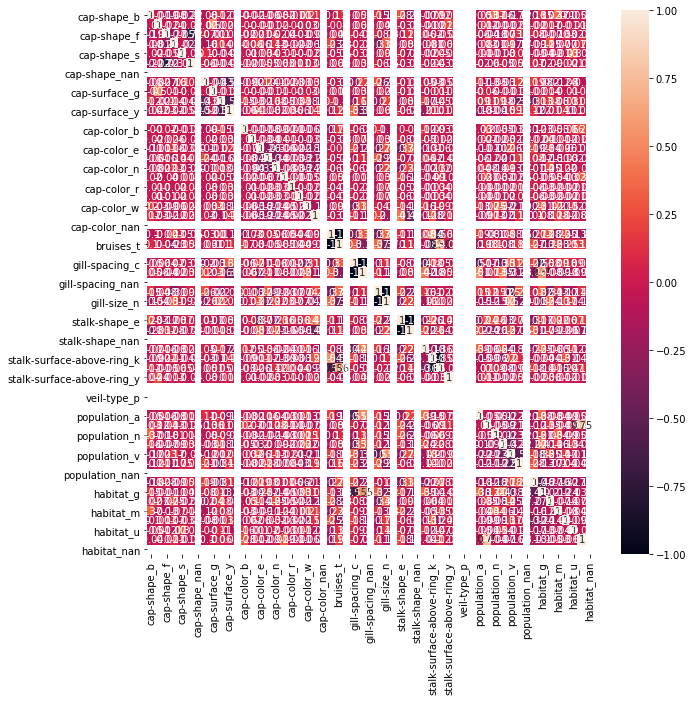

In [ ]:
correlation_matrix = X_train1.corr().round(2)
plt.figure(figsize = (10,10))
heatmap = sns.heatmap(data=correlation_matrix, annot=True)
#print(correlation_matrix)
# high_multi = train_data
selected = set()
for i in correlation_matrix.index:
    for j in correlation_matrix.columns:
        if correlation_matrix.loc[i,j] >= 0.8 and i != j:
            selected.add(i)
            selected.add(j)            
print(selected)

In [ ]:
df1 = df.drop(columns=[i[:-2] for i in list(selected)[2:]])

In [ ]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train

,cap-shape,cap-surface,cap-color,bruises,gill-spacing,gill-size,stalk-shape,stalk-surface-above-ring,veil-type,population,habitat
3564,x,y,n,t,c,b,t,s,p,y,d
6116,x,y,e,f,c,n,t,s,p,v,l
5979,f,y,y,f,c,b,e,k,p,v,d
7529,b,s,g,f,w,b,e,k,p,n,g
4261,x,y,g,f,c,b,e,k,p,y,p
...,...,...,...,...,...,...,...,...,...,...,...
3911,x,y,g,f,c,b,e,k,p,y,g
3732,f,y,n,t,c,b,t,s,p,y,d
3923,f,f,g,t,c,b,t,s,p,v,d
4956,f,y,y,f,c,b,e,k,p,y,g


In [ ]:
X = pd.get_dummies(X,dummy_na=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2)

### checking which algorthm has a better score

In [ ]:
classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="rbf", C=0.025, probability=True),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    LinearRegression() 
    ]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train1, y_train1)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test1, y_test1))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
model score: 1.000
SVC(C=0.025, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
model score: 0.969
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbos

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Bulid Pipeline

In [ ]:

# get categorical columns
categorical_columns = ['cap-shape', 'cap-surface', 'cap-color','bruises','gill-spacing','gill-size', 
                       'stalk-shape','stalk-surface-above-ring',
                       'veil-type',  'population', 'habitat']

# categorical variable preprocessing pipeline
categorical_pipe = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')), 
                                  ('ohe', OneHotEncoder(handle_unknown='ignore'))])

# combine preprocessing together                            
preprocessing = ColumnTransformer([('categorical', categorical_pipe,  categorical_columns)])

### Simple attempt to get baseline

In [ ]:
pipe = Pipeline([('prep' , preprocessing),
                 ('lr' , LogisticRegression())
                ])
pipe.fit(X_train, y_train.ravel())
y_pred = pipe.predict(X_test)
accuracy_score(y_test1.ravel(), y_pred)

0.4787692307692308

### Get hypperparamters of RandomForestClassifier and LogisticRegression

In [ ]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Pass through class, methods are present but do nothing.
class DummyEstimator(BaseEstimator):
    def fit(self): pass
    def score(self): pass

In [ ]:
pipe = Pipeline([('prep', preprocessing),
                 ('clf', DummyEstimator())
                ])

search_space = [
                 # LogisticRegression
                 {'clf' : [LogisticRegression(solver='liblinear')],
                  'clf__penalty': ['l1', 'l2'],
                  'clf__C' : np.logspace(0, 5, 10),
                  'clf__class_weight' : [None, 'balanced']
                 },
                 
                 # RandomForest
                 {'clf' : [RandomForestClassifier(n_jobs=-1)],
                  'clf__criterion' : ['gini', 'entropy'],
                  'clf__class_weight' : [None, 'balanced'],
                  'clf__max_depth' : list(range(4,9)),
                  'clf__max_features' : ['auto', 'log2', 'sqrt'],
                  'clf__n_estimators' : list(range(50, 250, 50)),
                  'clf__bootstrap' : [True, False]
                 },
                
                # KNeighborsClassifier
                {'clf' : [KNeighborsClassifier(n_neighbors=5  )],
                 'clf_weights' : ['uniform'],
                 'clf_algorithm': ['auto'],
                  'clf_leaf_size': [30, 60],
                   'clf_algorithm': ['auto']

                }
                
                ]



In [ ]:
clf_rand_cv = RandomizedSearchCV(estimator=pipe, 
                              param_distributions=search_space, 
                              n_iter=50,
                              cv=5, 
                              n_jobs=-1,
                              verbose=False)

### fit and find the best model

In [ ]:
best_model = clf_rand_cv.fit(X_train, y_train.ravel())
best_model.best_estimator_

Pipeline(memory=None,
         steps=[('prep',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('categorical',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='missing',
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                                      

### So RandomForestClassifier is the best one, we do clf_pipe again.

In [ ]:
clf_pipe = Pipeline([('clf', RandomForestClassifier(class_weight='balanced',
                                                     max_depth=7,
                                                     max_features='sqrt',
                                                     bootstrap=False,
                                                     n_estimators = 50,
                                                     n_jobs=-1,
                                                     criterion='entropy')
)])

pipe = Pipeline([
                 ('prep' , preprocessing),
                 ('rf', clf_pipe )
                ])


### Fit the test data for evaluation

In [ ]:
pipe = Pipeline([('prep' , preprocessing),
                 ('rf', clf_pipe )
                ])

In [ ]:
pipe.fit(X_train, y_train.ravel())
y_pred = pipe.predict(X_test)
accuracy = (accuracy_score(y_test.ravel(), y_pred))
accuracy

0.9889230769230769